# Fall Detection Analysis

This notebook analyzes sensor data from the motion monitoring app to tune fall detection thresholds.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('sensor_data.csv')
df.head()

,server_timestamp_utc,client_timestamp_ms,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z
0,2025-11-08T15:27:00.678Z,1762615622877,-1.080958,3.936193,8.660822,-0.811993,0.074067,1.231962
1,2025-11-08T15:27:00.718Z,1762615622913,-0.575474,3.550351,9.232108,-0.811993,0.074067,1.231962
2,2025-11-08T15:27:00.796Z,1762615623000,-0.575474,3.550351,9.232108,0.168752,-0.137445,0.858571
3,2025-11-08T15:27:00.855Z,1762615623059,0.803988,4.131806,9.169894,0.168752,-0.137445,0.858571
4,2025-11-08T15:27:00.940Z,1762615623141,0.803988,4.131806,9.169894,0.040928,0.290466,0.108581


In [3]:
df.dropna(inplace=True)

In [4]:
df['acc_mag'] = (df['acc_x']**2 + df['acc_y']**2 + df['acc_z']**2)**0.5

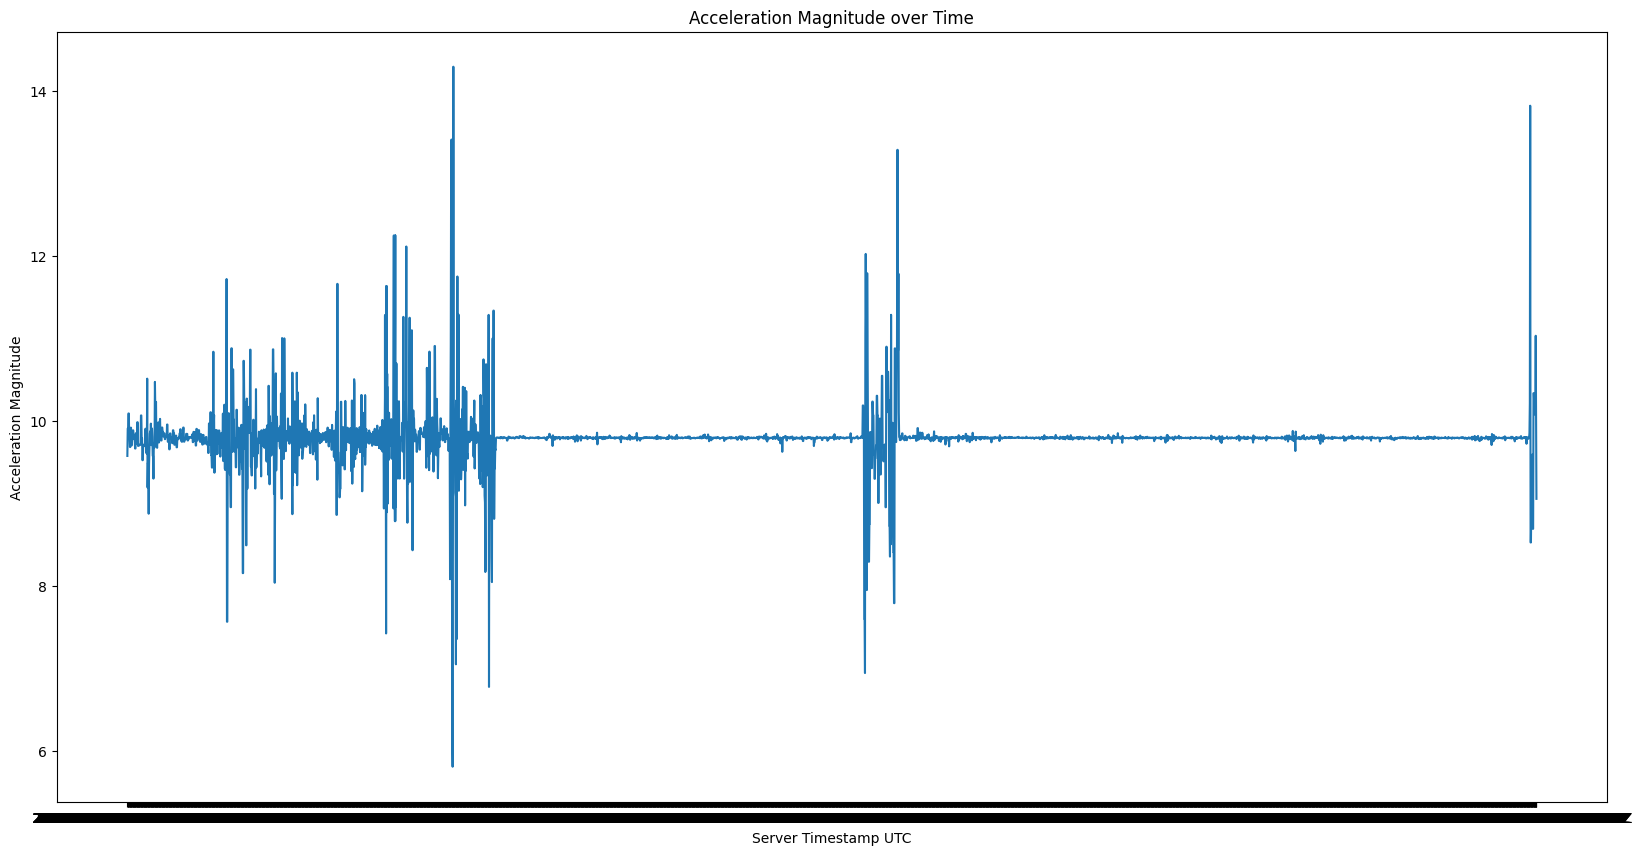

In [5]:
plt.figure(figsize=(20,10))
plt.plot(df['server_timestamp_utc'], df['acc_mag'])
plt.title('Acceleration Magnitude over Time')
plt.xlabel('Server Timestamp UTC')
plt.ylabel('Acceleration Magnitude')
plt.show()

In [6]:
print(f"Min acc_mag: {df['acc_mag'].min()}")
print(f"Max acc_mag: {df['acc_mag'].max()}")
print(f"Mean acc_mag: {df['acc_mag'].mean()}")

Min acc_mag: 5.80439668664139
Max acc_mag: 14.296254657612216
Mean acc_mag: 9.793528170088122


## Threshold Tuning Recommendations

Based on the sensor data analysis:

- **Acceleration Magnitude Statistics**:
  - Min: 5.80 m/s²
  - Max: 14.30 m/s²
  - Mean: 9.79 m/s²

- **Current Thresholds** (from app.py):
  - Freefall: 2.0 m/s²
  - Impact: 30.0 m/s²

- **Observations**:
  - The minimum acceleration in the data is 5.80 m/s², which is higher than the current freefall threshold of 2.0 m/s². This suggests the freefall threshold might be too low for detecting actual freefalls.
  - The maximum acceleration is 14.30 m/s², which is below the impact threshold of 30.0 m/s². This indicates the impact threshold might be too high.

- **Recommendations**:
  - Adjust FREEFALL_THRESHOLD to ~5.0 m/s² to better detect freefall phases.
  - Adjust IMPACT_THRESHOLD to ~15.0 m/s² to detect impacts based on observed data.
  - Collect data during simulated falls to refine these thresholds further.

To update the thresholds, modify the constants in `backend/app.py`.